In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression


In [54]:
df = pd.read_csv('/Users/aimaldastagirzada/Downloads/new_train.csv.zip')


In [55]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [57]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,32950.000000,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950.000000,32950.000000,32950.000000,32950.000000,32950,32950
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,no
freq,NaN,8314,19953,9736,26007,17254,27131,20908,11011,6857,NaN,NaN,NaN,NaN,28416,29238
mean,40.014112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.127466,2.560607,962.052413,0.174719,NaN,NaN
std,10.403636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.975917,2.752326,187.951096,0.499025,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,NaN


#Outliers- Age,duration, campagin , pdays ,previous,

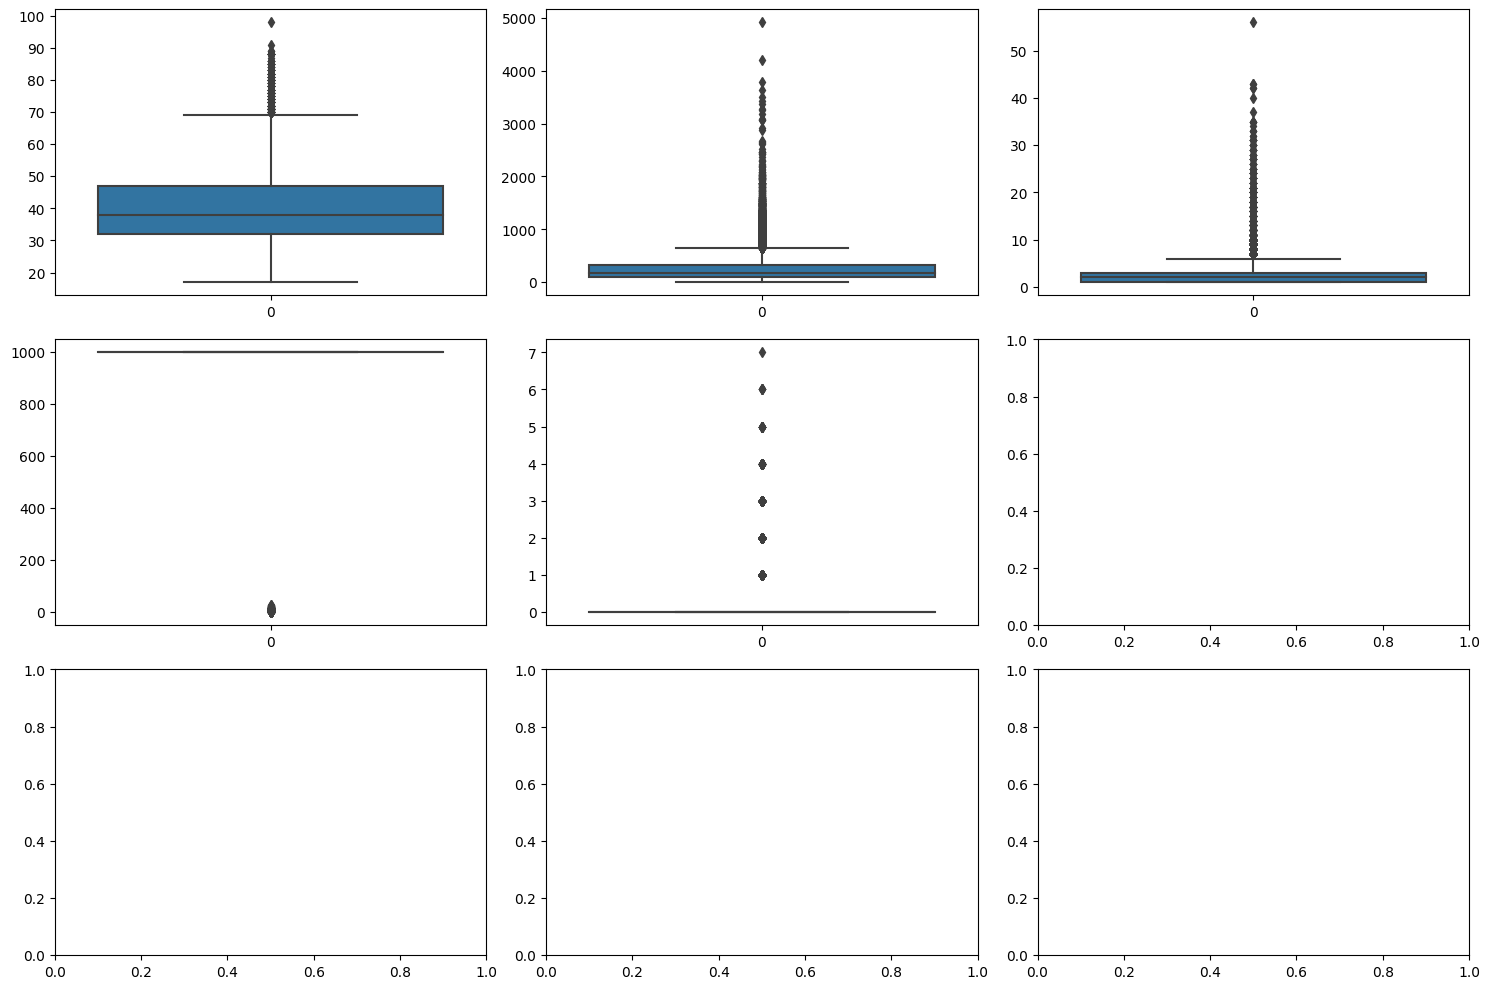

In [58]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
plt1 = sns.boxplot(df['age'], ax = axs[0,0])
plt2 = sns.boxplot(df['duration'], ax = axs[0,1])
plt3 = sns.boxplot(df['campaign'], ax = axs[0,2])
plt4 = sns.boxplot(df['pdays'], ax = axs[1,0])
plt5 = sns.boxplot(df['previous'], ax = axs[1,1])

plt.tight_layout()

In [59]:
df[df['age']>75].count()

age            189
job            189
marital        189
education      189
default        189
housing        189
loan           189
contact        189
month          189
day_of_week    189
duration       189
campaign       189
pdays          189
previous       189
poutcome       189
y              189
dtype: int64

In [60]:
df[df['duration']>2900].count()

age            14
job            14
marital        14
education      14
default        14
housing        14
loan           14
contact        14
month          14
day_of_week    14
duration       14
campaign       14
pdays          14
previous       14
poutcome       14
y              14
dtype: int64

In [61]:
df[df['campaign']>40].count()

age            5
job            5
marital        5
education      5
default        5
housing        5
loan           5
contact        5
month          5
day_of_week    5
duration       5
campaign       5
pdays          5
previous       5
poutcome       5
y              5
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [63]:
df = df[df['age'] < 75]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32745 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32745 non-null  int64 
 1   job          32745 non-null  object
 2   marital      32745 non-null  object
 3   education    32745 non-null  object
 4   default      32745 non-null  object
 5   housing      32745 non-null  object
 6   loan         32745 non-null  object
 7   contact      32745 non-null  object
 8   month        32745 non-null  object
 9   day_of_week  32745 non-null  object
 10  duration     32745 non-null  int64 
 11  campaign     32745 non-null  int64 
 12  pdays        32745 non-null  int64 
 13  previous     32745 non-null  int64 
 14  poutcome     32745 non-null  object
 15  y            32745 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.2+ MB


In [65]:
df = df[df['duration'] < 2900]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32731 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32731 non-null  int64 
 1   job          32731 non-null  object
 2   marital      32731 non-null  object
 3   education    32731 non-null  object
 4   default      32731 non-null  object
 5   housing      32731 non-null  object
 6   loan         32731 non-null  object
 7   contact      32731 non-null  object
 8   month        32731 non-null  object
 9   day_of_week  32731 non-null  object
 10  duration     32731 non-null  int64 
 11  campaign     32731 non-null  int64 
 12  pdays        32731 non-null  int64 
 13  previous     32731 non-null  int64 
 14  poutcome     32731 non-null  object
 15  y            32731 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.2+ MB


In [67]:
df = df[df['campaign'] < 40]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32725 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32725 non-null  int64 
 1   job          32725 non-null  object
 2   marital      32725 non-null  object
 3   education    32725 non-null  object
 4   default      32725 non-null  object
 5   housing      32725 non-null  object
 6   loan         32725 non-null  object
 7   contact      32725 non-null  object
 8   month        32725 non-null  object
 9   day_of_week  32725 non-null  object
 10  duration     32725 non-null  int64 
 11  campaign     32725 non-null  int64 
 12  pdays        32725 non-null  int64 
 13  previous     32725 non-null  int64 
 14  poutcome     32725 non-null  object
 15  y            32725 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.2+ MB


In [69]:
df = df[df['campaign'] < 34]

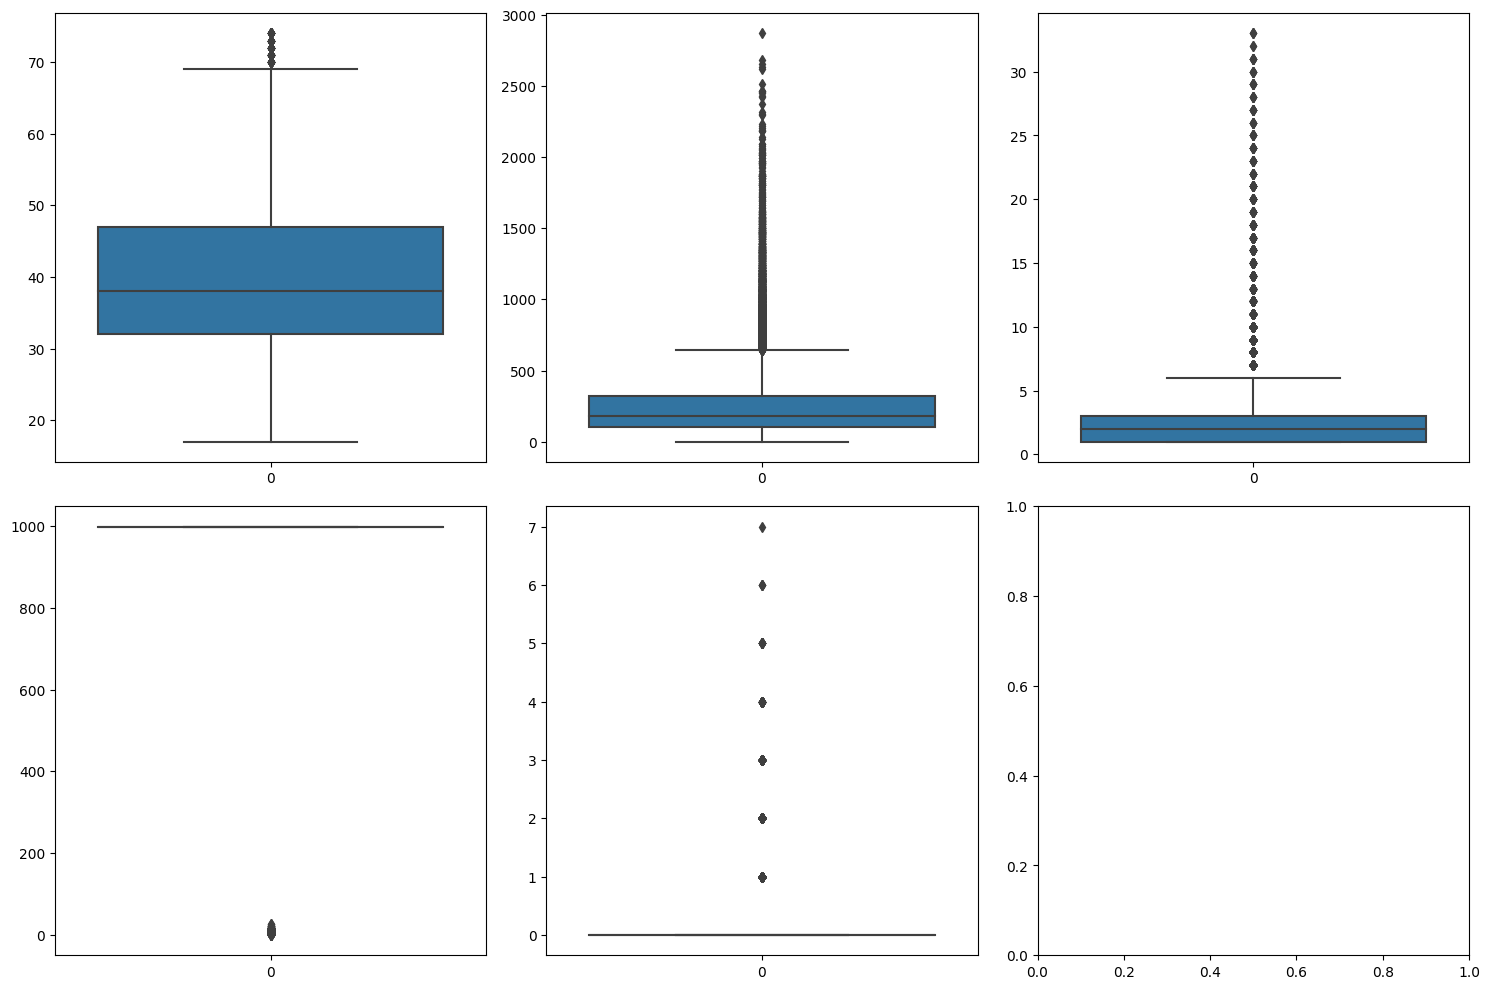

In [70]:
fig, axs = plt.subplots(2,3, figsize = (15,10))
plt1 = sns.boxplot(df['age'], ax = axs[0,0])
plt2 = sns.boxplot(df['duration'], ax = axs[0,1])
plt3 = sns.boxplot(df['campaign'], ax = axs[0,2])
plt4 = sns.boxplot(df['pdays'], ax = axs[1,0])
plt5 = sns.boxplot(df['previous'], ax = axs[1,1])

plt.tight_layout()

In [71]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


<Axes: xlabel='previous', ylabel='Count'>

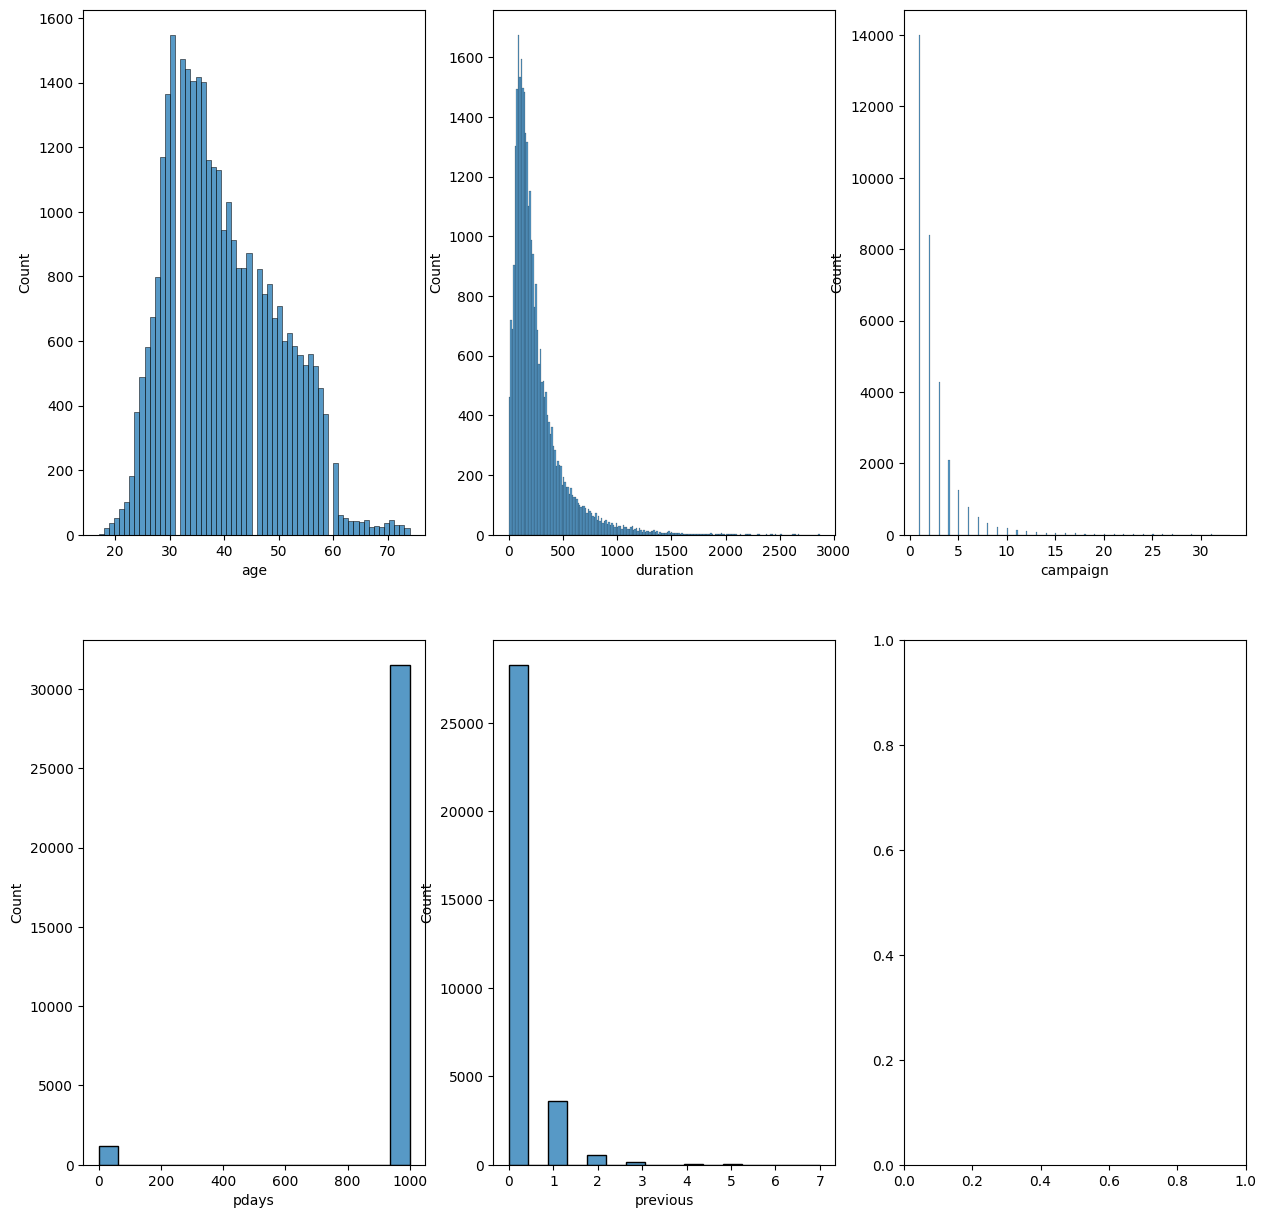

In [72]:
fig, axs = plt.subplots(2,3, figsize=(15,15))

sns.histplot(df['age'], ax =axs[0][0])
sns.histplot(df['duration'], ax=axs[0][1])
sns.histplot(df['campaign'], ax=axs[0][2])
sns.histplot(df['pdays'],ax =axs[1][0])
sns.histplot(df['previous'],ax=axs[1][1])


<Axes: xlabel='y', ylabel='previous'>

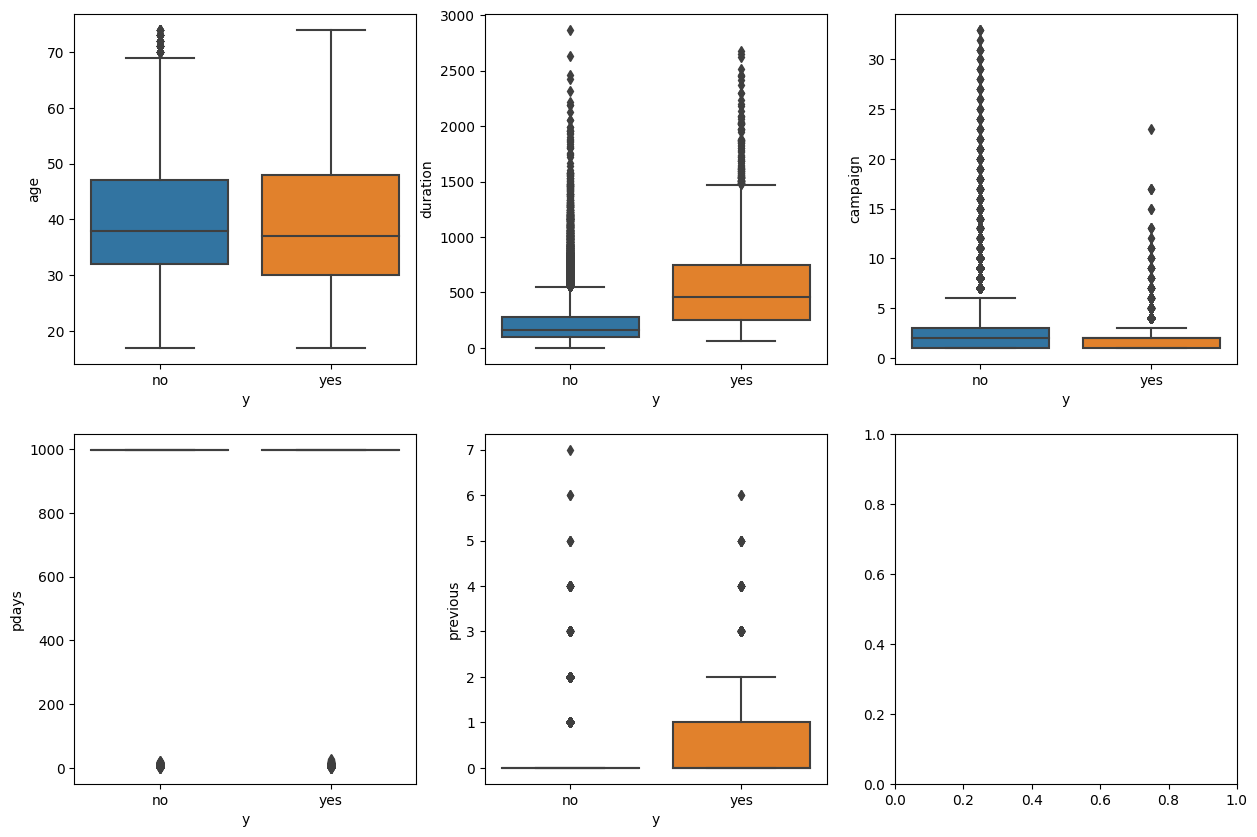

In [73]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
sns.boxplot(x='y', y='age', data=df, ax=axs[0][0])
sns.boxplot(x='y', y='duration', data=df, ax=axs[0][1])
sns.boxplot(x='y', y='campaign', data=df, ax=axs[0][2])
sns.boxplot(x='y', y='pdays', data=df, ax=axs[1][0])
sns.boxplot(x='y', y='previous', data=df, ax=axs[1][1])


**Initial hypothesis** 
age,duration, campagin and previous might be high predictor 


**Step-2**

In [74]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32719 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32719 non-null  int64 
 1   job          32719 non-null  object
 2   marital      32719 non-null  object
 3   education    32719 non-null  object
 4   default      32719 non-null  object
 5   housing      32719 non-null  object
 6   loan         32719 non-null  object
 7   contact      32719 non-null  object
 8   month        32719 non-null  object
 9   day_of_week  32719 non-null  object
 10  duration     32719 non-null  int64 
 11  campaign     32719 non-null  int64 
 12  pdays        32719 non-null  int64 
 13  previous     32719 non-null  int64 
 14  poutcome     32719 non-null  object
 15  y            32719 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.3+ MB


In [76]:
df.groupby(['job', 'y'])['age'].count().unstack()


y,no,yes
job,,
admin.,7239,1070
blue-collar,6922,514
entrepreneur,1060,100
housemaid,764,76
management,2071,267
retired,927,256
self-employed,978,117
services,2940,254
student,494,217


In [77]:
df.groupby(['marital', 'y'])['age'].count().unstack()


y,no,yes
marital,,
divorced,3268,328
married,17857,1955
single,7940,1306
unknown,54,11


In [78]:
df.groupby(['education', 'y'])['age'].count().unstack()


y,no,yes
education,,
basic.4y,2926,279
basic.6y,1705,154
basic.9y,4443,365
high.school,6764,810
illiterate,13,3
professional.course,3712,462
university.degree,8375,1335
unknown,1181,192


In [79]:
df.groupby(['default', 'y'])['age'].count().unstack()


y,no,yes
default,,
no,22552.0,3254.0
unknown,6564.0,346.0
yes,3.0,NaN


In [80]:
df.groupby(['housing', 'y'])['age'].count().unstack()


y,no,yes
housing,,
no,13222,1578
unknown,703,87
yes,15194,1935


In [81]:
df.groupby(['loan', 'y'])['age'].count().unstack()


y,no,yes
loan,,
no,23975,2964
unknown,703,87
yes,4441,549


In [82]:
df.groupby(['contact', 'y'])['age'].count().unstack()


y,no,yes
contact,,
cellular,17735,2977
telephone,11384,623


In [83]:
df.groupby(['month', 'y'])['age'].count().unstack()


y,no,yes
month,,
apr,1644,411
aug,4399,515
dec,64,69
jul,5223,517
jun,3799,433
mar,209,203
may,10296,694
nov,2929,320
oct,313,244


In [84]:
df.groupby(['day_of_week', 'y'])['age'].count().unstack()


y,no,yes
day_of_week,,
fri,5608,669
mon,6089,681
thu,6005,803
tue,5674,715
wed,5743,732


In [85]:
df.groupby(['poutcome', 'y'])['age'].count().unstack()


y,no,yes
poutcome,,
failure,2901,477
nonexistent,25839,2444
success,379,679


In [86]:
df[df['y'] =='no'].describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,29119.000000,29119,29119,29119,29119,29119,29119,29119,29119,29119,29119.000000,29119.000000,29119.000000,29119.000000,29119,29119
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,1
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,mon,NaN,NaN,NaN,NaN,nonexistent,no
freq,NaN,7239,17857,8375,22552,15194,23975,17735,10296,6089,NaN,NaN,NaN,NaN,25839,29119
mean,39.772863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.278753,2.611182,984.167382,0.132010,NaN,NaN
std,9.623723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.646399,2.755022,120.449245,0.409573,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,1.000000,999.000000,0.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.000000,2.000000,999.000000,0.000000,NaN,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.500000,3.000000,999.000000,0.000000,NaN,NaN


<Axes: xlabel='y', ylabel='duration'>

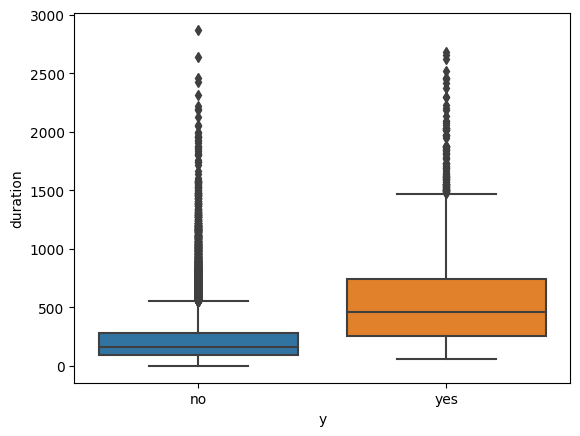

In [87]:
sns.boxplot(x='y', y='duration', data=df)

In [106]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,1
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,1
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,1
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,1
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,1
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,1
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,1


In [107]:
job = pd.get_dummies(df['job'],dtype=int)

marital=pd.get_dummies(df['marital'],dtype=int)

education = pd.get_dummies(df['education'],dtype=int)

default=pd.get_dummies(df['default'],dtype=int)

housing=pd.get_dummies(df['housing'],dtype=int)


loan = pd.get_dummies(df['loan'], dtype=int)

month = pd.get_dummies(df['month'], dtype=int)

poutcome = pd.get_dummies(df['poutcome'], dtype=int)

In [108]:
def y(x):
    if x =='no':
        return 1
    elif x =='yes':
        return 0

In [109]:
df['y']= df['y'].apply(y)

In [111]:
new_df

,age,duration,campaign,previous,admin.,blue-collar,entrepreneur,housemaid,management,retired,...,jun,mar,may,nov,oct,sep,failure,nonexistent,success,y
0,49,227,4,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,37,202,2,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,36,120,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,59,368,2,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
5,29,256,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32946,52,64,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
32947,54,131,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32948,29,165,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [94]:
new_df = pd.concat([df[['age','duration','campaign','previous']],job,marital, education, default, housing,loan,month,poutcome,df['y']], axis=1)

In [95]:
new_df

,age,duration,campaign,previous,admin.,blue-collar,entrepreneur,housemaid,management,retired,...,jun,mar,may,nov,oct,sep,failure,nonexistent,success,y
0,49,227,4,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,37,202,2,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,36,120,2,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,59,368,2,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
5,29,256,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32946,52,64,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
32947,54,131,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32948,29,165,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [96]:
new_df.head(1)

,age,duration,campaign,previous,admin.,blue-collar,entrepreneur,housemaid,management,retired,...,jun,mar,may,nov,oct,sep,failure,nonexistent,success,y
0,49,227,4,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [97]:
knn =KNeighborsClassifier(n_neighbors=50)

knn.fit(np.array(new_df.iloc[:,:50]), np.array(new_df.iloc[:,50]))

KNeighborsClassifier(n_neighbors=50)

In [98]:
pred = knn.predict(new_df.iloc[:,:50])

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [99]:
print(accuracy_score(pred, new_df.iloc[:,50]))
print(f1_score(pred, new_df.iloc[:,50]))
print(precision_score(pred, new_df.iloc[:,50]))

0.8978269507014273
0.9447994583973185
0.9824856622823586


In [102]:
from sklearn.svm import SVC


In [103]:
log = LogisticRegression() 
knn=KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(np.array(new_df.iloc[:,:50]), np.array(new_df.iloc[:,50]), test_size=0.2, random_state=123)

In [105]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [ ]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

In [ ]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

0.9507759052227598
0.9304415449753738
0.9407856490324723
0.9462330177027584


In [ ]:
print(precision_score(pred_l, y_test))
print(precision_score(pred_nb, y_test))
print(precision_score(pred_knn, y_test))
print(precision_score(pred_svc, y_test))

0.9770233196159122
0.9231824417009602
0.9711934156378601
0.9852537722908093


In [ ]:
pred_l_prob =log.predict_proba(X_test)

In [ ]:
pred_l_prob

array([[0.00702077, 0.99297923],
       [0.01877528, 0.98122472],
       [0.01196031, 0.98803969],
       ...,
       [0.12054353, 0.87945647],
       [0.0066534 , 0.9933466 ],
       [0.0314423 , 0.9685577 ]])

In [ ]:
fpr, tpr, thresholds =roc_curve(y_test, pred_l_prob[:,1])

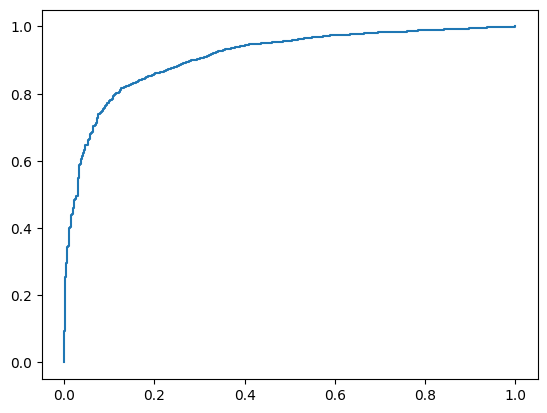

In [ ]:
plt.plot(fpr,tpr)

In [ ]:
gmeans = np.sqrt(tpr*(1-fpr))

In [ ]:
gmeans

array([0.        , 0.01309457, 0.30485329, 0.30463913, 0.50425391,
       0.50389917, 0.53628224, 0.53590444, 0.54302588, 0.5426428 ,
       0.54624428, 0.54585837, 0.58471308, 0.58429941, 0.58676758,
       0.58635187, 0.59468973, 0.59426782, 0.62797511, 0.62752895,
       0.63196478, 0.63151515, 0.65348628, 0.65302067, 0.6570155 ,
       0.65654671, 0.66013163, 0.65965993, 0.6648707 , 0.66439494,
       0.67206734, 0.67158574, 0.68237147, 0.68188179, 0.68836498,
       0.68787029, 0.68932867, 0.68883258, 0.69475163, 0.69425091,
       0.69509177, 0.69459008, 0.69494988, 0.69444757, 0.71359366,
       0.71307712, 0.73011786, 0.72958859, 0.74633967, 0.74579786,
       0.75309353, 0.75254602, 0.75309544, 0.7533151 , 0.75550816,
       0.7549581 , 0.76051776, 0.75996324, 0.7635365 , 0.76297897,
       0.76825023, 0.76768844, 0.77217476, 0.77160927, 0.77331026,
       0.77274311, 0.77782004, 0.77724875, 0.78061256, 0.78003837,
       0.78494925, 0.78437102, 0.78457916, 0.78400035, 0.78420

In [ ]:
np.argmax(gmeans)

176

In [ ]:
knn_params ={'n_neighbors': range (3,300),'weights': ['uniform', 'distance'], 'metric':['euclidean','manhattan']}
rs_knn=RandomizedSearchCV(knn,knn_params, n_iter=10, cv=5, scoring='precision')
rs_knn.fit(X_train,y_train)
rs_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn_best.fit(X_train,y_train)
pred_knn_best = knn_best.predict(X_test)
print(precision_score(pred_knn_best, y_test))

0.9386145404663924


In [ ]:
cv_scores_knn = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='precision')
print("Cross-validation scores for KNN: ", cv_scores_knn)

Cross-validation scores for KNN:  [0.92214935 0.92351816 0.92027766 0.92156863 0.92131767]


In [ ]:
svc_params = {'kernel':['linear']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=3, cv=10, scoring='precision')
rs_svc.fit(X_train, y_train)
rs_svc.best_estimator_

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
